# Setup

In [1]:
import Glob
import DataFrames
import CSV
import JSON

## Loading Data

In [2]:
data_directory = "./experiments/participants";

In [3]:
filenames_session = Glob.glob(data_directory * "/p*_[0-4]_*.csv" ) |> sort;
filenames_config = Glob.glob(data_directory * "/p*_[0-4]_*.json") |> sort;

In [4]:
data_session = [CSV.read(filename) for filename in filenames_session];
data_config = [JSON.parsefile(filename) for filename in filenames_config];

## Data Merging

In [5]:
for (i, session) in enumerate(data_session)
    
    participant_string = data_config[i]["details"]["participant"]
    (participant, block) = split(participant_string, "_")
    
    session[!, :condition] .= data_config[i]["CONDITION"]
    #session[!, :participant] .= parse(Int64, participant[2:end])
    session[!, :participant] .= participant
    session[!, :block] .= parse(Int64, block)
    session[!, :correct] = session[!, :digit] .== session[!, :keypress]
    
end

In [ ]:
data = vcat(data_session...)

# Analysis

In [54]:
using StatsPlots
using Statistics

In [55]:
gr()

Plots.GRBackend()

In [57]:
conditions = Dict(
    0 => "Direct Processor",
    1 => "Trained Processor"
)

Dict{Int64,String} with 2 entries:
  0 => "Direct Processor"
  1 => "Trained Processor"

## Mean Accuracy

In [58]:
mean_accuracy = DataFrames.by(
    data, 
    [:participant, :condition], 
    :correct => mean, 
    sort=true
)

,participant,condition,correct_mean
,SubStrin…,Int64,Float64
1,p1,0,0.676
2,p1,1,0.936
3,p10,0,0.5875
4,p10,1,0.652083
5,p11,0,0.3625
6,p11,1,0.502083
7,p2,0,0.8
8,p2,1,0.638
9,p3,0,0.568


In [59]:
agg_mean = DataFrames.by(
    mean_accuracy,
    :condition,
    :correct_mean => mean,
    :correct_mean => std,
    sort=true
)

,condition,correct_mean_mean,correct_mean_std
,Int64,Float64,Float64
1,0,0.598189,0.124226
2,1,0.756818,0.138052


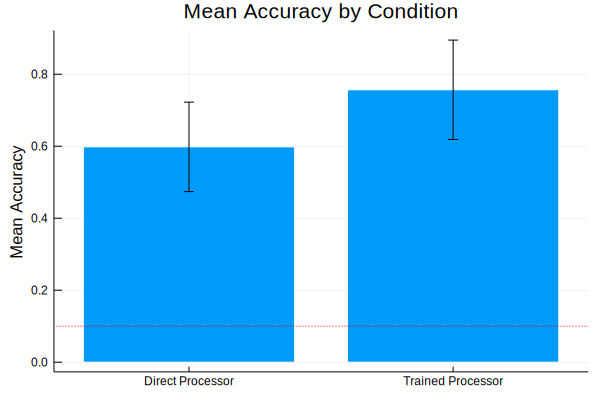

In [60]:
bar(
    map(x -> conditions[x], agg_mean[!, :condition]),
    agg_mean[!, :correct_mean_mean],
    yerr=agg_mean[!, :correct_mean_std],
    linecolor=:white,
    msc=:black,
    title="Mean Accuracy by Condition",
    ylabel="Mean Accuracy",
    legend=false,
)
hline!(
    [0.1],
    linecolor=:red,
    linestyle=:dot,
)

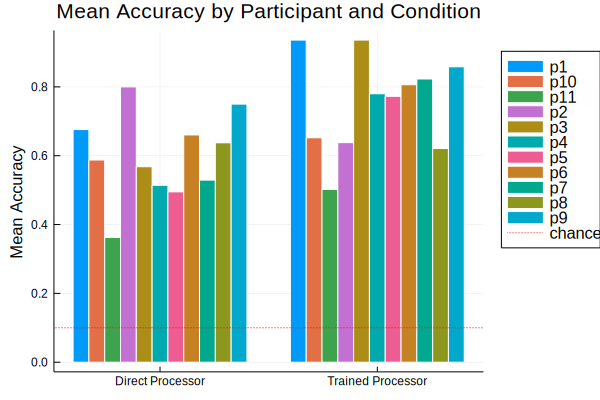

In [61]:
groupedbar(
    map(x -> conditions[x], mean_accuracy[!, :condition]),
    mean_accuracy[!, :correct_mean],
    group=mean_accuracy[!, :participant],
    linecolor=:white,
    title="Mean Accuracy by Participant and Condition",
    ylabel="Mean Accuracy",
    legend=:outertopright,
)
hline!(
    [0.1],
    linecolor=:red,
    linestyle=:dot,
    label="chance",
)

## Mean Time Taken

In [62]:
mean_time_taken = DataFrames.by(
    data, 
    [:participant, :condition], 
    :cuetime => mean, 
    :cuetime => std,
    sort=true
)

,participant,condition,cuetime_mean,cuetime_std
,SubStrin…,Int64,Float64,Float64
1,p1,0,3.53024,3.10045
2,p1,1,2.06568,2.10106
3,p10,0,2.37436,1.13685
4,p10,1,2.47592,1.42759
5,p11,0,3.18849,2.98286
6,p11,1,2.55876,1.89078
7,p2,0,2.2523,1.22367
8,p2,1,2.24258,1.38742
9,p3,0,3.22271,2.22023


In [63]:
agg_time_taken = DataFrames.by(
    mean_time_taken,
    :condition,
    :cuetime_mean => mean,
    :cuetime_mean => std,
    sort=true
)

,condition,cuetime_mean_mean,cuetime_mean_std
,Int64,Float64,Float64
1,0,3.34805,1.07756
2,1,2.60443,0.682641


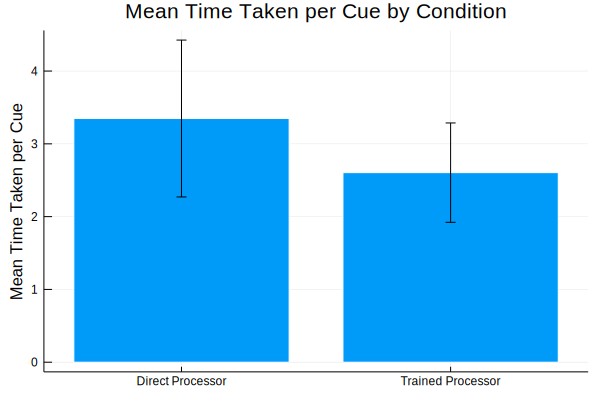

In [64]:
bar(
    map(x -> conditions[x], agg_time_taken[!, :condition]),
    agg_time_taken[!, :cuetime_mean_mean],
    yerr=agg_time_taken[!, :cuetime_mean_std],
    linecolor=:white,
    msc=:black,
    title="Mean Time Taken per Cue by Condition",
    ylabel="Mean Time Taken per Cue",
    legend=false,
)

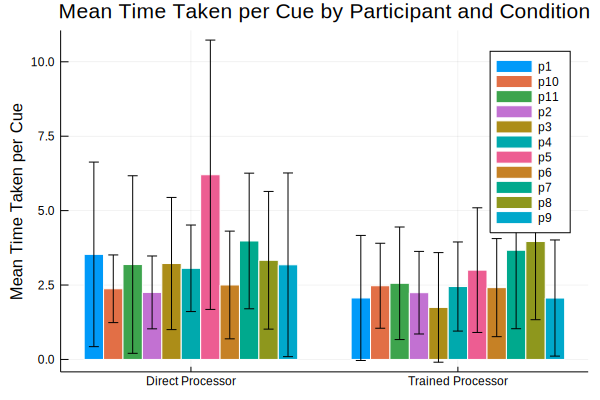

In [65]:
groupedbar(
    map(x -> conditions[x], mean_time_taken[!, :condition]),
    mean_time_taken[!, :cuetime_mean],
    yerr=mean_time_taken[!, :cuetime_std],
    group=mean_time_taken[!, :participant],
    msc=:black,
    linecolor=:white,
    title="Mean Time Taken per Cue by Participant and Condition",
    ylabel="Mean Time Taken per Cue",
)

## Confusion Matrix

In [66]:
using PyCall

In [67]:
metrics = pyimport("sklearn.metrics")

PyObject <module 'sklearn.metrics' from 'C:\\Users\\wjmn\\.julia\\conda\\3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

In [68]:
participants_set = sort(collect(Set(data[!, :participant])));
conditions_set = sort(collect(Set(data[!, :condition])));

In [69]:
subsets = [
    data[ 
        (data[!, :participant] .== participant) .&
        (data[!, :condition] .== condition)
    , :] for participant in participants_set for condition in conditions_set
];

In [70]:
confusions = [
    metrics.confusion_matrix(d[!, :digit], d[!, :keypress])
    for d in subsets
]

22-element Array{Array{Int64,2},1}:
 [44 4 … 0 0; 0 35 … 1 0; … ; 1 1 … 50 1; 1 0 … 2 29]  
 [41 0 … 0 2; 1 44 … 0 0; … ; 0 0 … 49 1; 0 0 … 0 36]  
 [39 0 … 1 1; 0 47 … 0 0; … ; 0 0 … 24 3; 7 0 … 3 13]  
 [15 0 … 3 0; 0 55 … 0 2; … ; 11 1 … 23 0; 0 3 … 0 32] 
 [8 0 … 0 4; 0 51 … 0 0; … ; 0 1 … 38 0; 2 1 … 1 2]    
 [24 4 … 1 0; 3 34 … 0 0; … ; 0 0 … 30 3; 0 0 … 0 32]  
 [39 0 … 1 5; 0 51 … 0 0; … ; 0 0 … 51 1; 7 0 … 0 30]  
 [20 0 … 0 0; 0 24 … 0 0; … ; 0 0 … 41 1; 0 0 … 0 49]  
 [26 2 … 0 11; 0 46 … 0 1; … ; 1 0 … 18 2; 0 0 … 2 1]  
 [50 0 … 1 0; 0 41 … 0 0; … ; 0 0 … 45 0; 1 0 … 0 47]  
 [18 0 … 8 6; 3 36 … 0 1; … ; 3 0 … 23 7; 4 0 … 6 9]   
 [44 0 … 0 0; 0 32 … 0 0; … ; 0 1 … 35 0; 1 0 … 1 40]  
 [9 0 … 2 8; 0 31 … 0 0; … ; 2 0 … 7 16; 1 0 … 7 27]   
 [16 0 … 2 0; 2 42 … 0 2; … ; 0 3 … 27 1; 2 1 … 1 39]  
 [16 0 … 4 7; 0 52 … 1 0; … ; 1 0 … 28 3; 4 0 … 5 22]  
 [46 0 … 1 0; 0 22 … 2 3; … ; 0 1 … 38 1; 1 2 … 2 41]  
 [14 0 … 2 18; 1 26 … 0 0; … ; 4 1 … 24 1; 10 1 … 2 25]
 [33 2 … 0 0

In [71]:
heatmap_labels = [
    join([participant, ": ", conditions[condition]])
    for participant in participants_set for condition in conditions_set
]

22-element Array{String,1}:
 "p1: Direct Processor"  
 "p1: Trained Processor" 
 "p10: Direct Processor" 
 "p10: Trained Processor"
 "p11: Direct Processor" 
 "p11: Trained Processor"
 "p2: Direct Processor"  
 "p2: Trained Processor" 
 "p3: Direct Processor"  
 "p3: Trained Processor" 
 "p4: Direct Processor"  
 "p4: Trained Processor" 
 "p5: Direct Processor"  
 "p5: Trained Processor" 
 "p6: Direct Processor"  
 "p6: Trained Processor" 
 "p7: Direct Processor"  
 "p7: Trained Processor" 
 "p8: Direct Processor"  
 "p8: Trained Processor" 
 "p9: Direct Processor"  
 "p9: Trained Processor" 

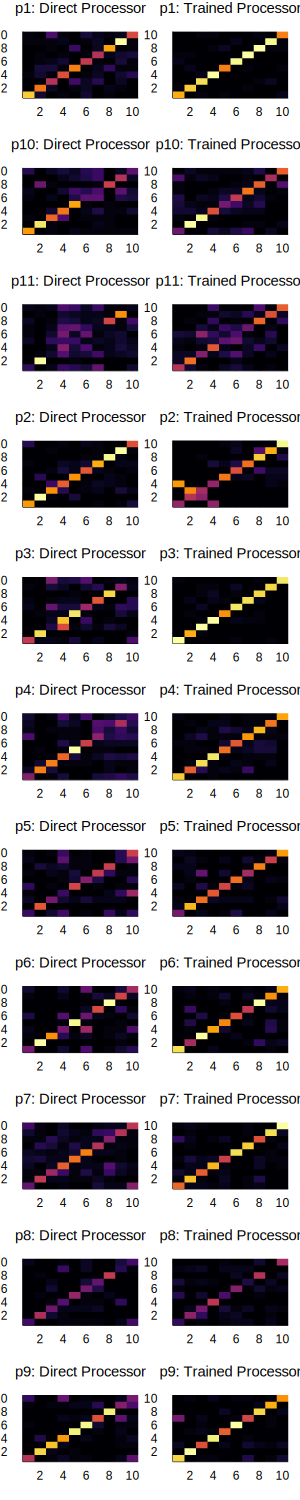

In [78]:
layout = @layout[a b; c d; e f; g h; i j; k l; m n; o p; q r; s t ; u v]
heatmaps = [ 
    heatmap(
        confusion,
        size=(500,500),
        clims=(0, 50),
        colorbar=false,
        title=label,
        titlefontsize=10
    )
    for (confusion, label) in zip(confusions, heatmap_labels)
]
plot(heatmaps..., layout=layout, size=(300, 1500))

## Learning Curve 

In [79]:
function moving(column::Array{<:Number}; window=20)
    width = window ÷ 2
    moving = []
    for i in 1:(length(column))
        if i < width
            push!(moving, NaN)
        elseif i > (length(column) - width)
            push!(moving, NaN)
        else
            average = sum(column[(i-width+1):i+width]) / window
            push!(moving, average)
        end
    end
    moving
end

moving (generic function with 1 method)

In [80]:
window_size = 50

50

In [81]:
for subset in subsets
    subset[!, :moving_average] .= moving(Int.(subset[!, :correct]), window=window_size)
end

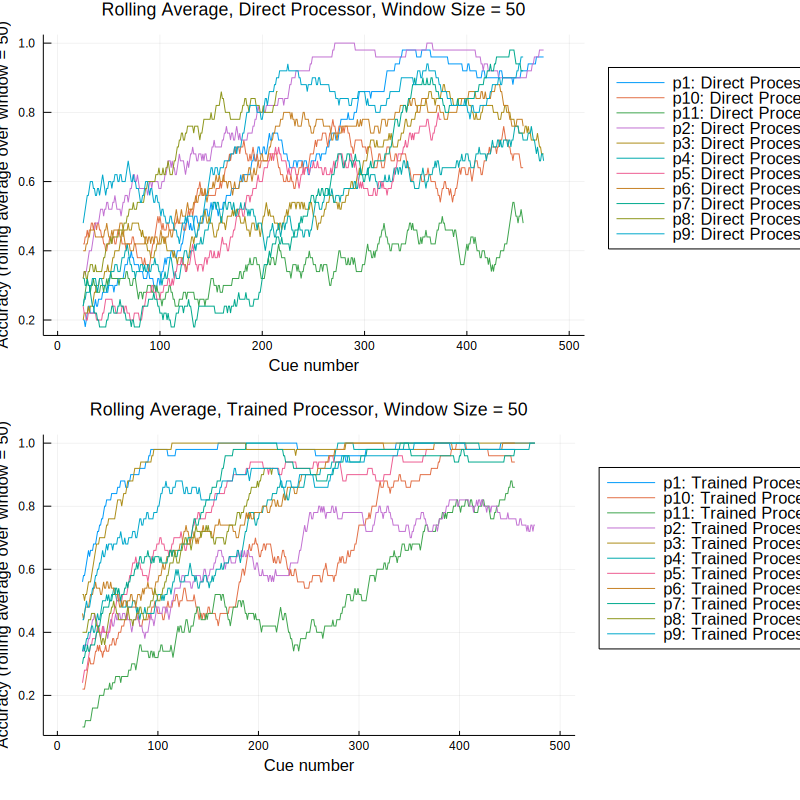

In [82]:
p1 = plot(
    [s[!, :moving_average] for (i, s) in enumerate(subsets) if occursin("Direct", heatmap_labels[i])],
    label=[label for label in heatmap_labels if occursin("Direct", label)],
    legend=:outertopright,
    title="Rolling Average, Direct Processor, Window Size = $window_size",
    titlefontsize=12,
    ylabel="Accuracy (rolling average over window = $window_size)",
    xlabel="Cue number",
)

p2 = plot(
    [s[!, :moving_average] for (i, s) in enumerate(subsets) if occursin("Trained", heatmap_labels[i])],
    label=[label for label in heatmap_labels if occursin("Trained", label)],
    legend=:outertopright,
    title="Rolling Average, Trained Processor, Window Size = $window_size",
    titlefontsize=12,
    ylabel="Accuracy (rolling average over window = $window_size)",
    xlabel="Cue number",
)

layout=@layout[a;b]
plot(p1, p2, layout=layout, size=(800, 800))

## Statistical Effects

In [83]:
# Had to Pkg.rm("Atom") because of incompatibility
# Pkg.add("GLM")

In [84]:
using GLM

In [85]:
data

,trial,cue,digit,keypress,cuetime,trialtime,sessiontime,condition,participant
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,SubStrin…
1,0,0,8,0,3.56245,6.51641,7.78259,1,p10
2,0,1,2,2,3.10118,9.62042,10.8866,1,p10
3,0,2,9,1,3.72535,13.3485,14.6146,1,p10
4,0,3,2,3,3.59716,16.9484,18.2146,1,p10
5,0,4,8,0,2.62138,19.5725,20.8387,1,p10
6,0,5,1,7,3.04535,22.6205,23.8867,1,p10
7,0,6,4,1,2.65325,25.2764,26.5426,1,p10
8,0,7,0,0,3.12539,28.4044,29.6706,1,p10
9,0,8,5,2,4.99732,33.4044,34.6706,1,p10


In [86]:
data[!, :digit] = string.(data[!, :digit]);

In [87]:
glm(@formula(correct ~ cue * trial * block + condition + participant + digit), data, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

correct ~ 1 + cue + trial + block + condition + participant + digit + cue & trial + cue & block + trial & block + cue & trial & block

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────
                        Estimate  Std. Error     z value  Pr(>|z|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          -2.08177     0.220253     -9.45172     <1e-20  -2.51346     -1.65008    
cue                   0.0184719   0.0151818     1.21671     0.2237  -0.0112839    0.0482277  
trial                 0.176255    0.0245575     7.17723     <1e-12   0.128123     0.224387   
block                 0.758783    0.0871263     8.709       <1e-17   0.588018

## No-Feedback Trials

In [45]:
filenames_primer_session = Glob.glob(data_directory * "/p?_p*.csv" ) |> sort;
filenames_primer_config = Glob.glob(data_directory * "/p?_p*.json") |> sort;

In [46]:
data_primer_session = [CSV.read(filename) for filename in filenames_primer_session];
data_primer_config = [JSON.parsefile(filename) for filename in filenames_primer_config];

In [47]:
for (i, primer) in enumerate(data_primer_session)
    
    participant_string = data_primer_config[i]["details"]["participant"]
    (participant, block) = split(participant_string, "_")
    
    primer[!, :participant] .= participant
    primer[!, :correct] = primer[!, :digit] .== primer[!, :keypress]
    
end

In [48]:
data_primer = vcat(data_primer_session...);

In [49]:
mean_accuracy = DataFrames.by(
    data_primer, 
    [:processor, :participant], 
    :correct => mean, 
    sort=true
)

,processor,participant,correct_mean
,String,SubStrin…,Float64
1,control,p5,0.288889
2,control,p6,0.285714
3,control,p7,0.163265
4,control,p8,0.0434783
5,test,p5,0.0181818
6,test,p6,0.293103
7,test,p7,0.0588235
8,test,p8,0.0740741
